# Pumpkin Seed Classification

* Pumpkin seeds are frequently consumed as confection worldwide because of their adequate amount of protein, fat, carbohydrate, and mineral contents. 

* This study was carried out on the two most important and quality types of pumpkin seeds, ‘‘Urgup_Sivrisi’’ and ‘‘Cercevelik’’, generally grown in Urgup and Karacaoren regions in Turkey. 

* Morphological measurements of 2500 pumpkin seeds of both varieties were made possible by using the gray and binary forms of threshold techniques. 

# Importing the necessary libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [3]:
df = pd.read_excel('D:/BATCH_25/random_forest/Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset.xlsx')
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


The given dataset is for Pumpkin seeds and we have Class column as the target variable. We have to determine the class of the pumpkin from the features of the pumpkins seeds. The dataset has 12 features for the pumpkin seeds.

In [4]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

As shown the data has no null or missing values so proceeding to do the EDA part 

# Exploratory Data Analysis

In [5]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


All the features have numerical values. The target variable has string values.

## Setting Style for all the Figures

In [7]:
sns.set(style = 'whitegrid' ,font = 'Rubik', font_scale = 1.1, rc={'axes.facecolor':'#ffffff', 'figure.facecolor':'#ffffff',
                                                                   "axes.spines.right": False, "axes.spines.top": False})

### Countplot for the target
As we can see there are 2 classes and both of the classes have almost equal values

Text(0.5, 1.0, 'Countplot for the 2 Classes')

findfont: Font family ['Rubik'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Rubik'] not found. Falling back to DejaVu Sans.


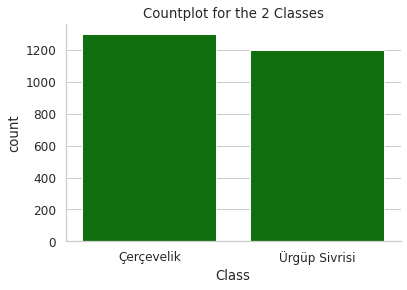

In [8]:
a = sns.countplot(x = 'Class', data = data, color = 'Green')
a.set_title('Countplot for the 2 Classes')

In [9]:
data['Class'].value_counts()

Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: Class, dtype: int64

# BoxPlots for all featues

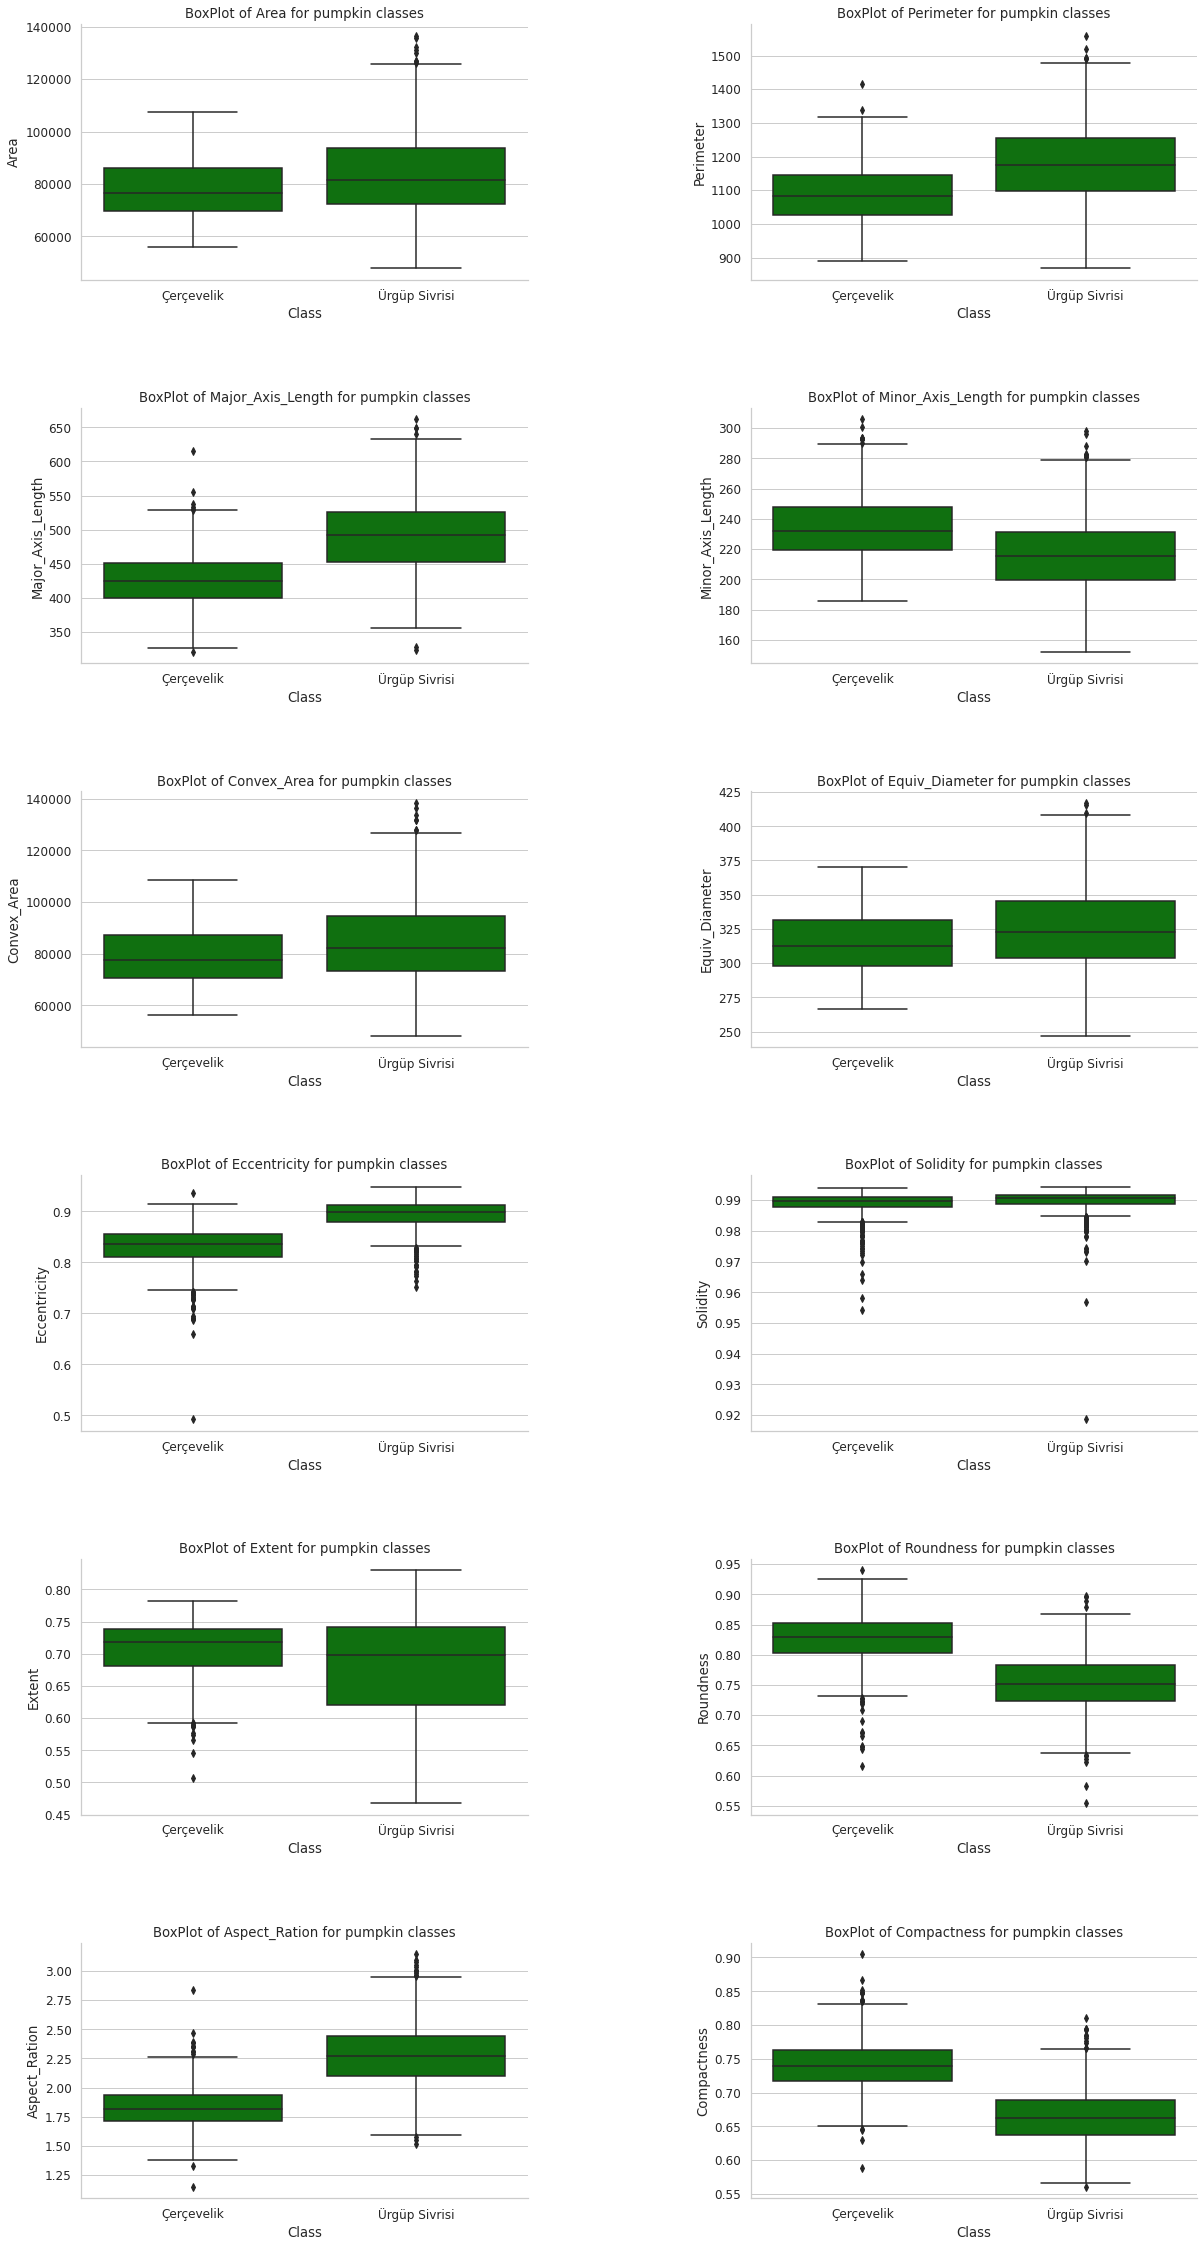

In [10]:
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (20, 40))
for nr, c in enumerate(data.columns):
    if c!= 'Class':
        sns.boxplot(data = data, x = 'Class', y = c, ax = axes[nr // 2, nr % 2], color = 'Green')
        axes[nr // 2, nr % 2].set_title('BoxPlot of ' + c + ' for pumpkin classes')
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

As seen in the figures above. We can draw certain conclusions
* Both the Classes of Pumpkin have different set of values for almost all features except one.
* The solidity feature is of less importance for us, because the set of values for both classes are same for Solidity.
* Based on this observation we can drop the solidity column as it is no a distinguishing feature.

# Seperating into Features and Labels

In [11]:
X = data.drop('Class', axis = 1)
y = data['Class']

In [11]:
X.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness'],
      dtype='object')

In [12]:
cols = X.columns
cols

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness'],
      dtype='object')

# CountPlot for all features

In [13]:
def plot(i, c):
    minm = X[c].min()
    maxm = X[c].max()
    q = (maxm - minm) / 5
    arr = [minm, (minm + q), (minm + 2 * q), (minm + 3 * q), (minm + 4 * q), (minm + 5 * q)]
    a = sns.countplot(x = pd.cut(X[c], arr), data = X, color = 'Green', ax = axes[(i // 2), (i % 2)])
    a.set_title('Countplot for ' + c)

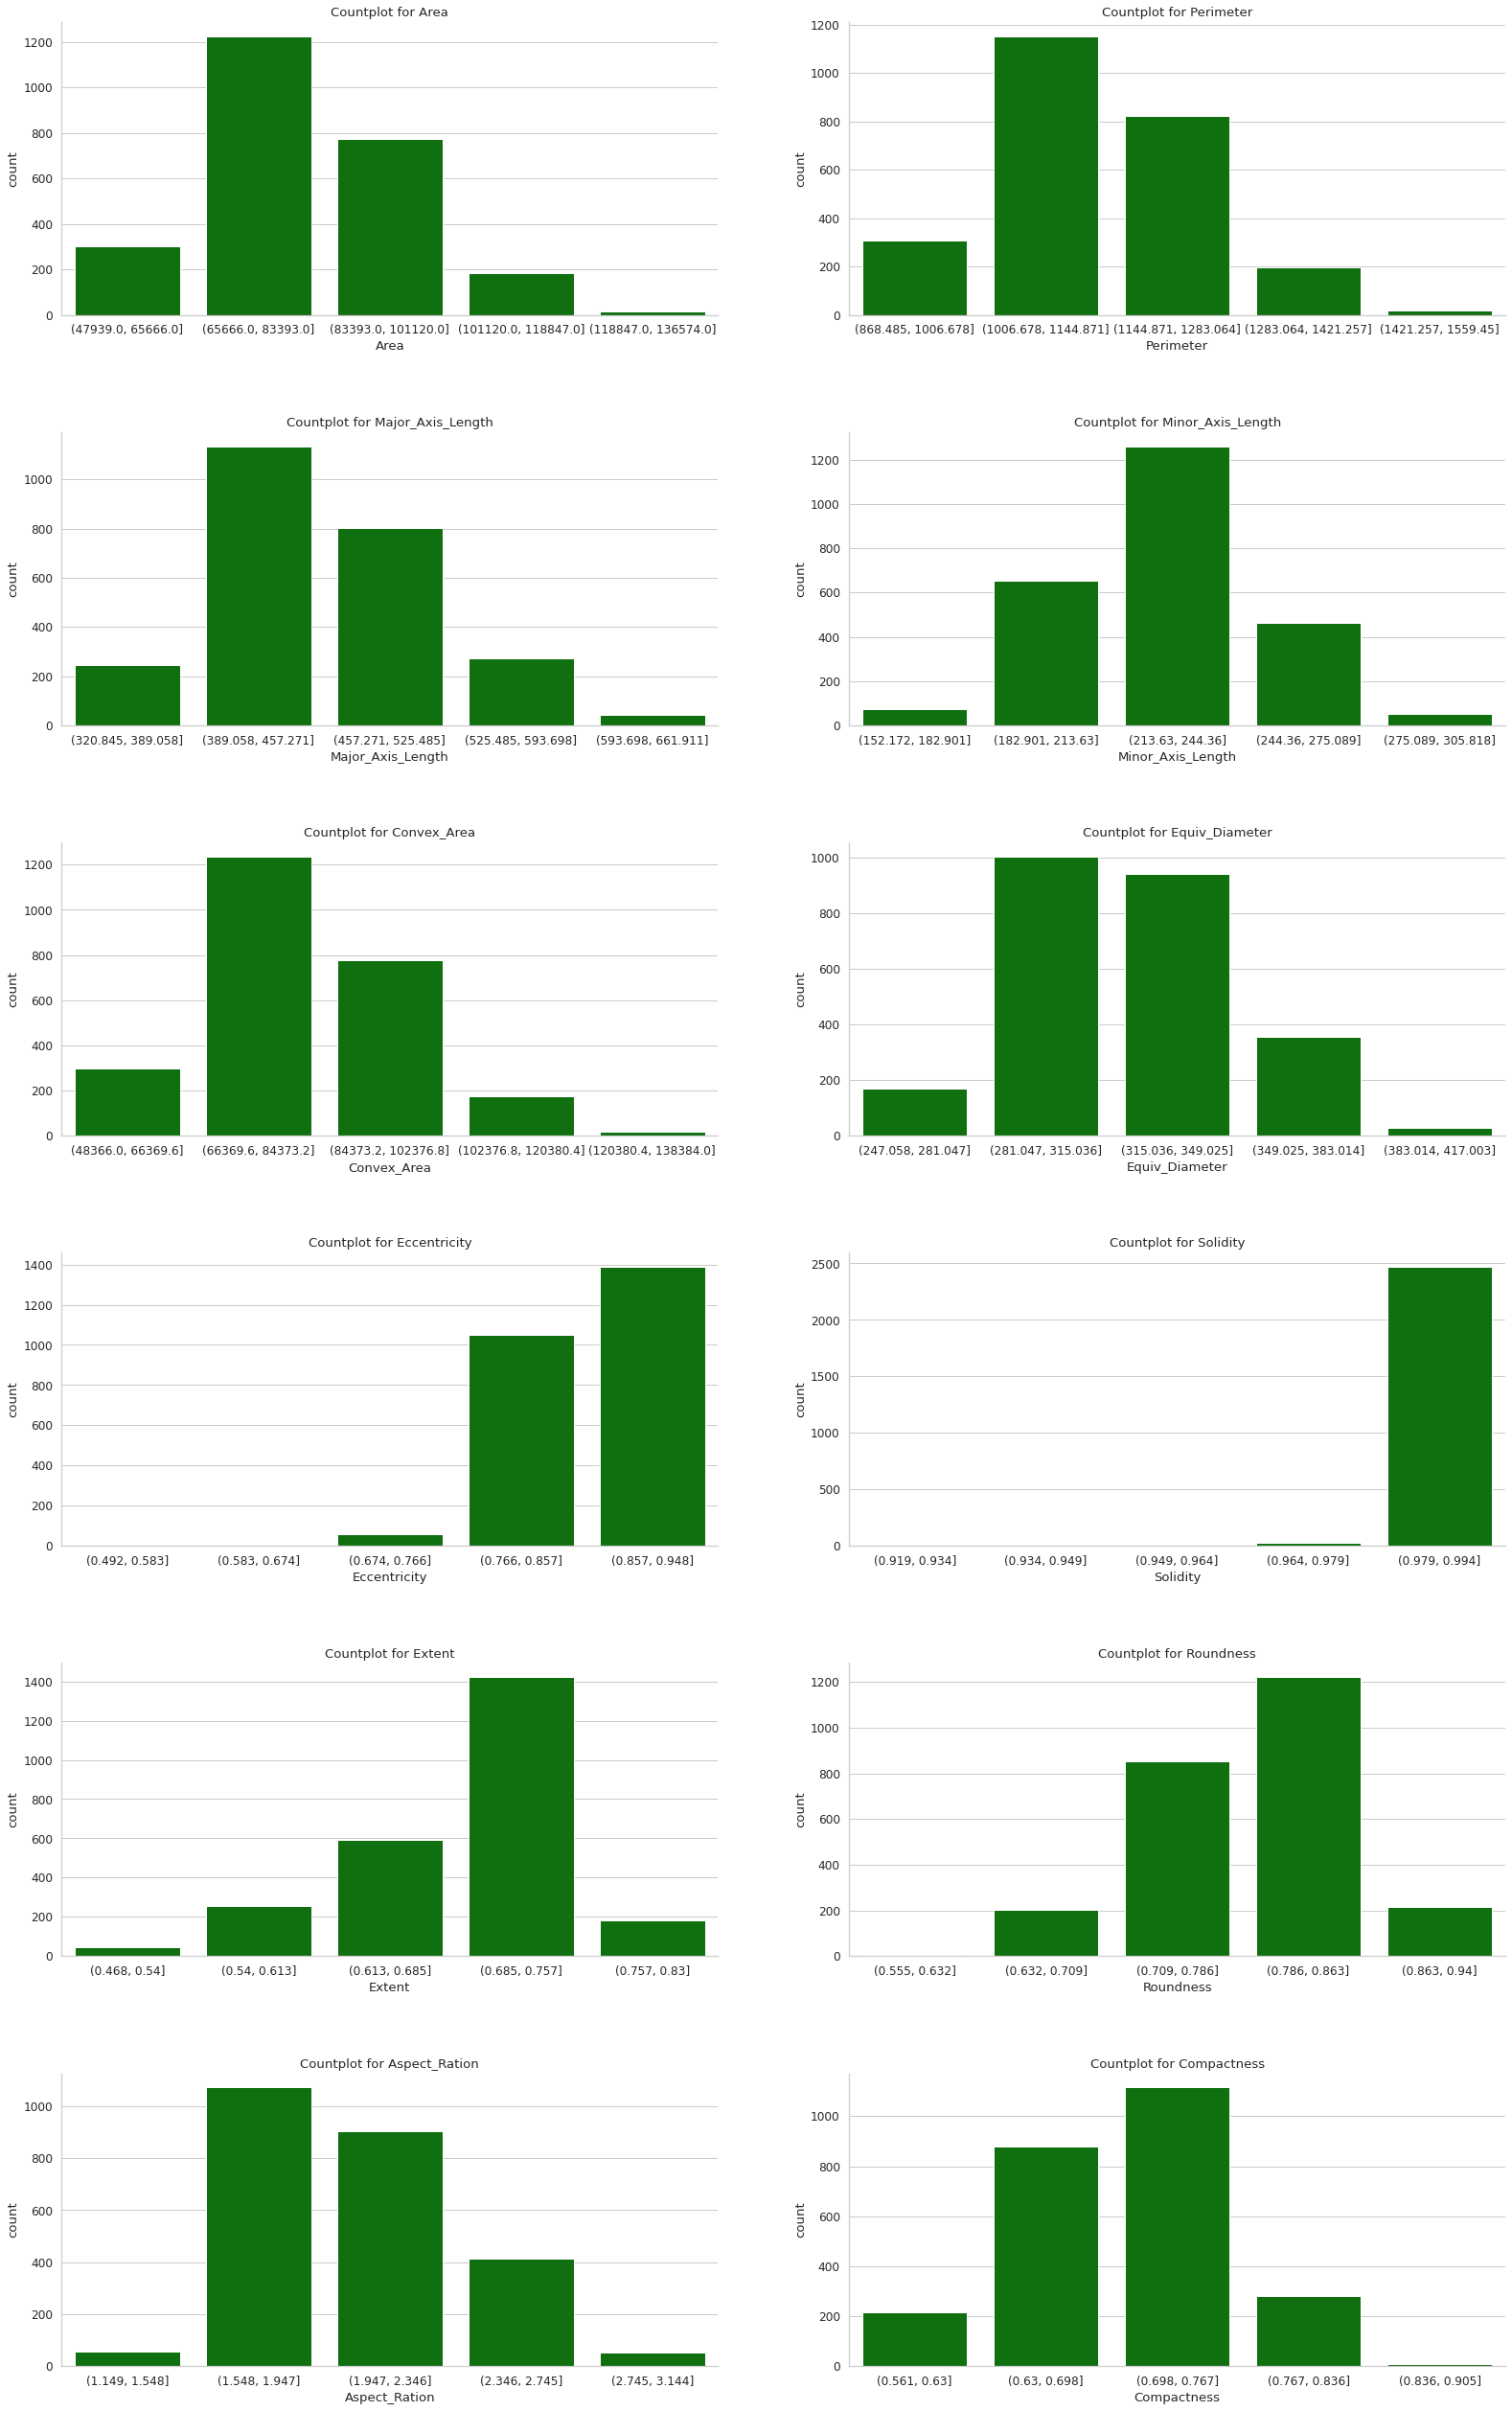

In [14]:
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (27, 45))
for i in range(12):
    b = cols[i]
    plot(i, b)
plt.subplots_adjust(hspace = 0.4, wspace = 0.2)    

Based on the counplots we can draw conclusions as given below.
* All the classes have well distributed values.
* The solidity values are highly skewed and belong in a certain small region only.

# Correlation plot for all features

In [12]:
corr = X.corr()
corr.style.background_gradient('coolwarm')

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
Area,1.000000,0.928548,0.789133,0.685304,0.999806,0.998464,0.159624,0.158388,-0.014018,-0.149378,0.159960,-0.160438
Perimeter,0.928548,1.000000,0.946181,0.392913,0.929971,0.928055,0.464601,0.065340,-0.140600,-0.500968,0.487880,-0.484440
Major_Axis_Length,0.789133,0.946181,1.000000,0.099376,0.789061,0.787078,0.704287,0.119291,-0.214990,-0.684972,0.729156,-0.726958
Minor_Axis_Length,0.685304,0.392913,0.099376,1.000000,0.685634,0.690020,-0.590877,0.090915,0.233576,0.558566,-0.598475,0.603441
Convex_Area,0.999806,0.929971,0.789061,0.685634,1.000000,0.998289,0.159156,0.139178,-0.015449,-0.153615,0.159822,-0.160432
Equiv_Diameter,0.998464,0.928055,0.787078,0.690020,0.998289,1.000000,0.156246,0.159454,-0.010970,-0.145313,0.155762,-0.156411
Eccentricity,0.159624,0.464601,0.704287,-0.590877,0.159156,0.156246,1.000000,0.043991,-0.327316,-0.890651,0.950225,-0.981689
Solidity,0.158388,0.065340,0.119291,0.090915,0.139178,0.159454,0.043991,1.000000,0.067537,0.200836,0.026410,-0.019967
Extent,-0.014018,-0.140600,-0.214990,0.233576,-0.015449,-0.010970,-0.327316,0.067537,1.000000,0.352338,-0.329933,0.336984
Roundness,-0.149378,-0.500968,-0.684972,0.558566,-0.153615,-0.145313,-0.890651,0.200836,0.352338,1.000000,-0.935233,0.933308


<AxesSubplot:title={'center':' Correlation of Features'}>

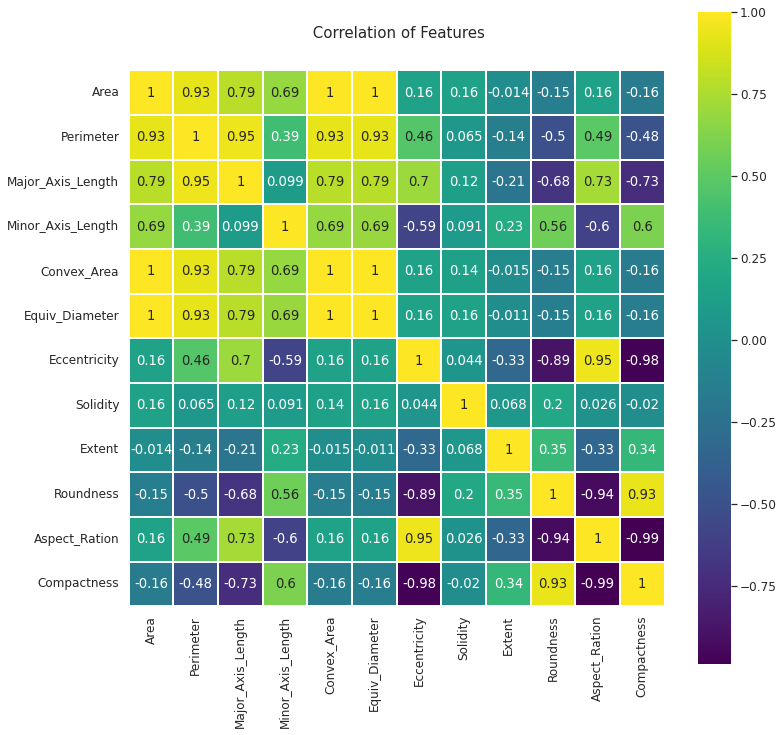

In [19]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title(' Correlation of Features', y=1.05, size=15)
sns.heatmap(X.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

As seen in the correlation plot, we can conclude
* Area feature has a very high correlation with Convex_Area and Equiv_Diameter features
* Eccentricity and Aspect_Ration have a high correlation
* Major_Axis_length has a high correlation with Perimeter.
* We will try to train model after dropping the features of Convex_Area and Solidity

In [20]:
X1 = X.drop(columns = ['Solidity', 'Convex_Area'], axis = 1)
y1 = data['Class']
X1.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Equiv_Diameter,Eccentricity,Extent,Roundness,Aspect_Ration,Compactness
0,56276,888.242,326.1485,220.2388,267.6805,0.7376,0.7453,0.8963,1.4809,0.8207
1,76631,1068.146,417.1932,234.2289,312.3614,0.8275,0.7151,0.8440,1.7811,0.7487
2,71623,1082.987,435.8328,211.0457,301.9822,0.8749,0.7400,0.7674,2.0651,0.6929
3,66458,992.051,381.5638,222.5322,290.8899,0.8123,0.7396,0.8486,1.7146,0.7624
4,66107,998.146,383.8883,220.4545,290.1207,0.8187,0.6752,0.8338,1.7413,0.7557


# Model Selection

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2)

# Functions for Model Evaluation

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
def model_evaluation(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot = labels, cmap = 'Greens', fmt = '')
    y_pred = classifier.predict(X_test)
    yt_pred = classifier.predict(X_train)
    print('The Training Accuracy of the algorithm is ', accuracy_score(y_train, yt_pred))
    print('The Testing Accuracy of the algorithm is ', accuracy_score(y_test, y_pred))
    return [(accuracy_score(y_train * 100, yt_pred * 100) * 100), (accuracy_score(y_test * 100, y_pred * 100) * 100)]

In [26]:
def model_evaluation1(classifier):
    cm = confusion_matrix(y_test, classifier.predict(X1_test))
    counts = [value for value in cm.flatten()]
    labels = [f'{v1}' for v1 in counts]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm, annot = labels, cmap = 'Blues', fmt = '')
    y1_pred = classifier.predict(X1_test)
    yt1_pred = classifier.predict(X1_train)
    print('The Training Accuracy of the algorithm is ', accuracy_score(y1_train, yt1_pred))
    print('The Testing Accuracy of the algorithm is ', accuracy_score(y1_test, y1_pred))
    return [(accuracy_score(y1_train, yt1_pred) * 100), (accuracy_score(y1_test, y1_pred) * 100)]

# Note
* All the models here after will be evaluated on 2 datasets.
* The first dataset is the one where no column is dropped and the confusion matrix will be plotted in Green Colour.
* The secodn dataset is the one where some columns are dropped to try improve the accuracy and the confusion matrix for this data will be plotted in Blue Colour.

# K Nearest Neighbors

In [27]:
from sklearn.neighbors import KNeighborsClassifier

The Training Accuracy of the algorithm is  0.771
The Testing Accuracy of the algorithm is  0.704


[77.10000000000001, 70.39999999999999]

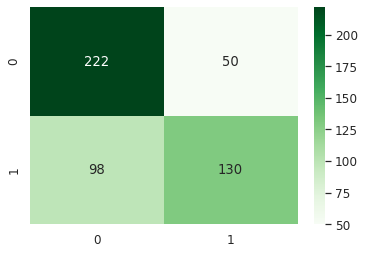

In [28]:
knn = KNeighborsClassifier(10, weights = 'uniform', metric = 'manhattan')
knn.fit(X_train, y_train)
model_evaluation(knn)

The Training Accuracy of the algorithm is  0.809
The Testing Accuracy of the algorithm is  0.714


[80.9, 71.39999999999999]

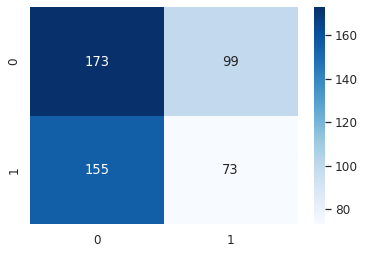

In [29]:
knn1 = KNeighborsClassifier(10, weights = 'uniform', metric = 'manhattan')
knn1.fit(X1_train, y1_train)
model_evaluation1(knn1)

# Support Vector Classifier

In [30]:
from sklearn.svm import SVC

The Training Accuracy of the algorithm is  0.8855
The Testing Accuracy of the algorithm is  0.89


[88.55, 89.0]

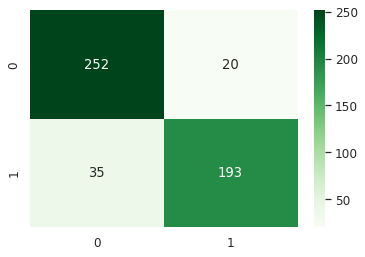

In [31]:
svc = SVC(C = 1E6)
svc.fit(X_train, y_train)
model_evaluation(svc)

The Training Accuracy of the algorithm is  0.88
The Testing Accuracy of the algorithm is  0.87


[88.0, 87.0]

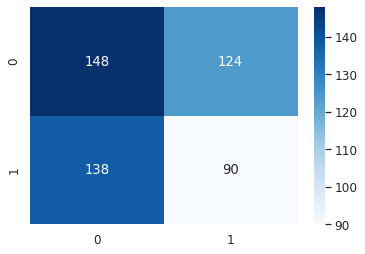

In [32]:
svc1 = SVC(C = 1E6)
svc1.fit(X1_train, y1_train)
model_evaluation1(svc1)

# Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

The Training Accuracy of the algorithm is  0.898
The Testing Accuracy of the algorithm is  0.868


[89.8, 86.8]

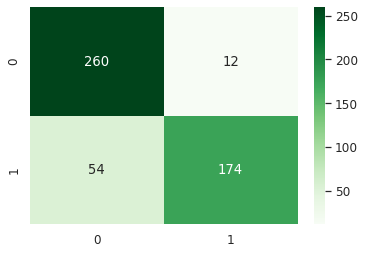

In [34]:
    dt = DecisionTreeClassifier(max_depth = 5)
    dt.fit(X_train, y_train)
    model_evaluation(dt)

The Training Accuracy of the algorithm is  0.903
The Testing Accuracy of the algorithm is  0.86


[90.3, 86.0]

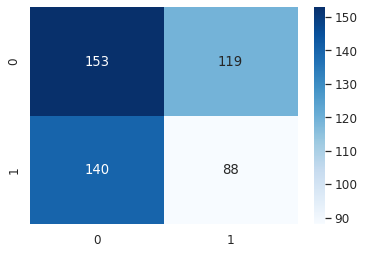

In [35]:
dt1 = DecisionTreeClassifier(max_depth = 5)
dt1.fit(X1_train, y1_train)
model_evaluation1(dt1)

# Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

The Training Accuracy of the algorithm is  0.892
The Testing Accuracy of the algorithm is  0.876


[89.2, 87.6]

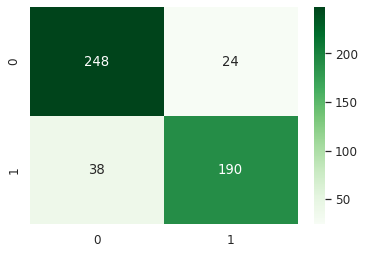

In [37]:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
model_evaluation(rf)

The Training Accuracy of the algorithm is  0.8945
The Testing Accuracy of the algorithm is  0.858


[89.45, 85.8]

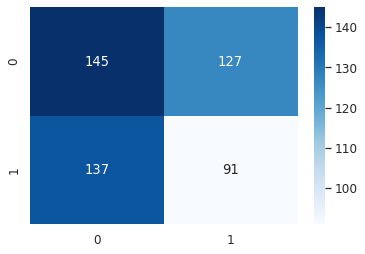

In [38]:
rf1 = RandomForestClassifier(max_depth = 4)
rf1.fit(X1_train, y1_train)
model_evaluation1(rf1)

# Gradient Boosting Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

The Training Accuracy of the algorithm is  0.8855
The Testing Accuracy of the algorithm is  0.876


[88.55, 87.6]

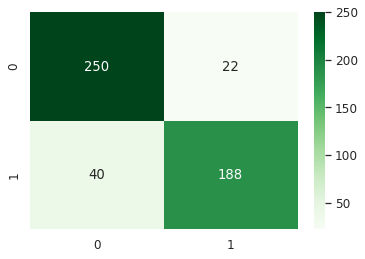

In [40]:
gbc = GradientBoostingClassifier(learning_rate = 0.005)
gbc.fit(X_train, y_train)
model_evaluation(gbc)

The Training Accuracy of the algorithm is  0.893
The Testing Accuracy of the algorithm is  0.862


[89.3, 86.2]

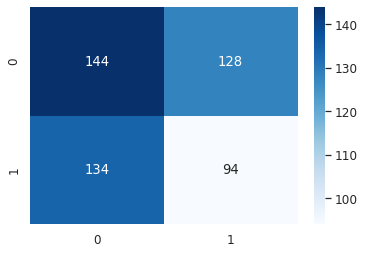

In [41]:
gbc1 = GradientBoostingClassifier(learning_rate = 0.005)
gbc1.fit(X1_train, y1_train)
model_evaluation1(gbc1)

In [42]:
results1 = pd.DataFrame(columns = ['Training Accuracy Base Model', 'Testing Accuracy Base Model'],index = ['K Nearest Neighbors', 
                                                                                    'Support Vector Machines', 'Decision Tree', 'Random Forest', 'Gradient Boost'])

The Training Accuracy of the algorithm is  0.771
The Testing Accuracy of the algorithm is  0.704
The Training Accuracy of the algorithm is  0.8855
The Testing Accuracy of the algorithm is  0.89
The Training Accuracy of the algorithm is  0.898
The Testing Accuracy of the algorithm is  0.868
The Training Accuracy of the algorithm is  0.892
The Testing Accuracy of the algorithm is  0.876
The Training Accuracy of the algorithm is  0.8855
The Testing Accuracy of the algorithm is  0.876


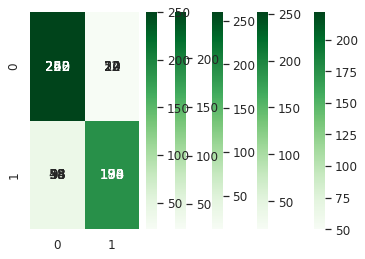

In [43]:
results1.loc['K Nearest Neighbors'] = model_evaluation(knn);
results1.loc['Support Vector Machines'] = model_evaluation(svc);
results1.loc['Decision Tree'] = model_evaluation(dt);
results1.loc['Random Forest'] = model_evaluation(rf);
results1.loc['Gradient Boost'] = model_evaluation(gbc);

In [44]:
results1

,Training Accuracy Base Model,Testing Accuracy Base Model
K Nearest Neighbors,77.1,70.4
Support Vector Machines,88.55,89.0
Decision Tree,89.8,86.8
Random Forest,89.2,87.6
Gradient Boost,88.55,87.6


In [45]:
results2 = pd.DataFrame(columns = ['Training Accuracy Dropped Columns', 'Testing Accuracy Dropped Columns'],index = ['K Nearest Neighbors', 
                                                                                    'Support Vector Machines', 'Decision Tree', 'Random Forest', 'Gradient Boost'])

The Training Accuracy of the algorithm is  0.809
The Testing Accuracy of the algorithm is  0.714
The Training Accuracy of the algorithm is  0.88
The Testing Accuracy of the algorithm is  0.87
The Training Accuracy of the algorithm is  0.903
The Testing Accuracy of the algorithm is  0.86
The Training Accuracy of the algorithm is  0.8945
The Testing Accuracy of the algorithm is  0.858
The Training Accuracy of the algorithm is  0.893
The Testing Accuracy of the algorithm is  0.862


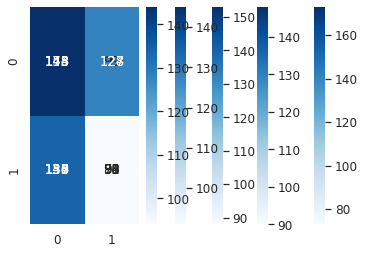

In [46]:
results2.loc['K Nearest Neighbors'] = model_evaluation1(knn1);
results2.loc['Support Vector Machines'] = model_evaluation1(svc1);
results2.loc['Decision Tree'] = model_evaluation1(dt1);
results2.loc['Random Forest'] = model_evaluation1(rf1);
results2.loc['Gradient Boost'] = model_evaluation1(gbc1);

In [47]:
results = pd.concat([results1, results2], join = 'outer', axis = 1)

# Results

In [48]:
results

,Training Accuracy Base Model,Testing Accuracy Base Model,Training Accuracy Dropped Columns,Testing Accuracy Dropped Columns
K Nearest Neighbors,77.1,70.4,80.9,71.4
Support Vector Machines,88.55,89.0,88.0,87.0
Decision Tree,89.8,86.8,90.3,86.0
Random Forest,89.2,87.6,89.45,85.8
Gradient Boost,88.55,87.6,89.3,86.2


# Conclusion
* We tried to improve accuracy by dropping colums, but it did not affect the accuracy much.
* We have achieved good accuracies with SVM, Gradient Boost ,Random Forest Algorithms and Decision Tree.